---
#Descripción del Dataset
---

El dataset de citas rápidas recopila información sobre la interacción y los resultados de eventos de speed dating, donde dos participantes se evalúan mutuamente para determinar su interés en continuar conociéndose. Incluye características demográficas, preferencias personales, evaluaciones durante la cita, y decisiones finales, lo que permite analizar factores que influyen en la formación de conexiones románticas. Las variables disponibles facilitan la exploración de aspectos como la importancia de la atracción física, la inteligencia, la afinidad por intereses compartidos, y cómo características demográficas impactan en la compatibilidad y en la posibilidad de un "match" mutuo.


#variable del dataset

Variable dependiente (target)

  -match: Indica si hubo un match entre los participantes. → Tipo de dato: Entero (1 = Sí, 0 = No)

Variables independientes (características)

  -Edad: Edad del participante. → Tipo de dato: Entero

  -Sexo: Género del participante. → Tipo de dato: Entero (0 = Mujer, 1 = Hombre)
  
  -Atracción física: Puntuación de la atracción física otorgada por el participante durante la cita. → Tipo de dato: Decimal
  
   -Sinceridad: Puntuación de la sinceridad percibida durante la cita. → Tipo de dato: Decimal
   
  -Diversión: Puntuación otorgada sobre cuán divertida fue la cita. → Tipo de dato: Decimal
   
  -Inteligencia: Puntuación sobre la inteligencia percibida del otro participante. → Tipo de dato: Decimal
   
   -Éxito: Puntuación sobre el éxito percibido del otro participante. → Tipo de dato: Decimal

Puntuaciones otorgadas durante la cita

  -attr: Puntuación de la atracción física otorgada por el participante. → Tipo de dato: Decimal
    
  -sinc: Puntuación de la sinceridad percibida durante la cita. → Tipo de dato: Decimal
   
  -fun: Puntuación otorgada sobre cuán divertida fue la cita. → Tipo de dato: Decimal
    
  -intel: Puntuación sobre la inteligencia percibida del otro participante. → Tipo de dato: Decimal
  
  -amb: Puntuación sobre el éxito percibido del otro participante. → Tipo de dato: Decimal

Preferencias del participante

  -pref_o_attr: Importancia que el participante le otorga a la atracción física. → Tipo de dato: Decimal
  
  -pref_o_sinc: Importancia que el participante le otorga a la sinceridad. → Tipo de dato: Decimal
  
  -pref_o_fun: Importancia que el participante le otorga a la diversión. → Tipo de dato: Decimal
  
  -pref_o_intel: Importancia que el participante le otorga a la inteligencia. → Tipo de dato: Decimal
  
  -pref_o_amb: Importancia que el participante le otorga al éxito. → Tipo de dato: Decimal

Intereses en común

   -shared_interests_o: Número de intereses en común que los participantes declararon tener. → Tipo de dato: Entero

#Librerias

-import pandas as pd

-import numpy as np

-import matplotlib.pyplot as plt

-from sklearn.model_selection import train_test_split,
GridSearchCV, RandomizedSearchCV

-from sklearn.preprocessing import OneHotEncoder,
StandardScaler, LabelEncoder

-from sklearn.metrics import (classification_report, confusion_matrix,
                             roc_curve, auc, accuracy_score,
                             recall_score, f1_score)

-from sklearn.neighbors import KNeighborsClassifier

-from sklearn.ensemble import RandomForestClassifier

-from sklearn.linear_model import LogisticRegression

-from sklearn.tree import DecisionTreeClassifier


---
#1.-a)Descripción utilizando métodos estadísticos
---

In [ ]:
import pandas as pd

# Cargar el dataset
from google.colab import drive
df = pd.read_csv('/content/speeddating.csv')

# Identificar los tipos de datos de cada columna
print(df.dtypes)

# Descripción estadística de variables numéricas
print(df.describe())


id                     int64
has_null               int64
wave                   int64
gender                object
age                   object
                       ...  
d_guess_prob_liked    object
met                   object
decision               int64
decision_o             int64
match                  int64
Length: 124, dtype: object
                id    has_null         wave        d_age     samerace  \
count  8378.000000  8378.00000  8378.000000  8378.000000  8378.000000   
mean   4189.500000     0.87491    11.350919     4.185605     0.395799   
std    2418.664611     0.33084     5.995903     4.596171     0.489051   
min       1.000000     0.00000     1.000000     0.000000     0.000000   
25%    2095.250000     1.00000     7.000000     1.000000     0.000000   
50%    4189.500000     1.00000    11.000000     3.000000     0.000000   
75%    6283.750000     1.00000    15.000000     5.000000     1.000000   
max    8378.000000     1.00000    21.000000    37.000000     1.000000 

<ipython-input-8-d9a313b5d272>:5: DtypeWarning: Columns (4,11,12,16,17,18,19,20,40,41,42,43,44,45,52,53,54,55,56,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,108,110) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/speeddating.csv')


In [ ]:
# Resumen estadístico de las variables numéricas
descriptive_stats = df.describe()

# Mediana y moda solo para columnas numéricas
medians = df.select_dtypes(include=['number']).median() #  Select only numeric columns
modes = df.select_dtypes(include=['number']).mode().iloc[0] # Select only numeric columns


print(f"Medidas Descriptivas:\n{descriptive_stats}")
print(f"Medianas:\n{medians}")
print(f"Modas:\n{modes}")


Medidas Descriptivas:
                 id      has_null          wave         d_age      decision  \
count  21554.000000  21554.000000  21554.000000  21554.000000  21550.000000   
mean    4735.683910      0.948873     12.744177      4.214299      0.419954   
std     2162.281218      0.220263      5.292377      4.618540      0.493562   
min        1.000000      0.000000      1.000000      0.000000      0.000000   
25%     2989.000000      1.000000      9.000000      1.000000      0.000000   
50%     4785.000000      1.000000     12.000000      3.000000      0.000000   
75%     6581.750000      1.000000     17.000000      5.000000      1.000000   
max     8378.000000      1.000000     21.000000     37.000000      1.000000   

         decision_o         match  
count  21550.000000  21550.000000  
mean       0.419536      0.162506  
std        0.493495      0.368923  
min        0.000000      0.000000  
25%        0.000000      0.000000  
50%        0.000000      0.000000  
75%        1.0

In [ ]:
# Detección de valores atípicos usando el rango intercuartílico
numeric_df = df.select_dtypes(include=['number'])

Q1 = numeric_df.quantile(0.25)
Q3 = numeric_df.quantile(0.75)
IQR = Q3 - Q1

# Identificar outliers, using the numeric DataFrame
outliers = ((numeric_df < (Q1 - 1.5 * IQR)) | (numeric_df > (Q3 + 1.5 * IQR))).sum()
print(f"Outliers detectados por columna:\n{outliers}")


Outliers detectados por columna:
id               0
has_null      1048
wave             0
d_age          355
samerace         0
decision         0
decision_o       0
match         1380
dtype: int64


---
#B) Visualizar datos
---

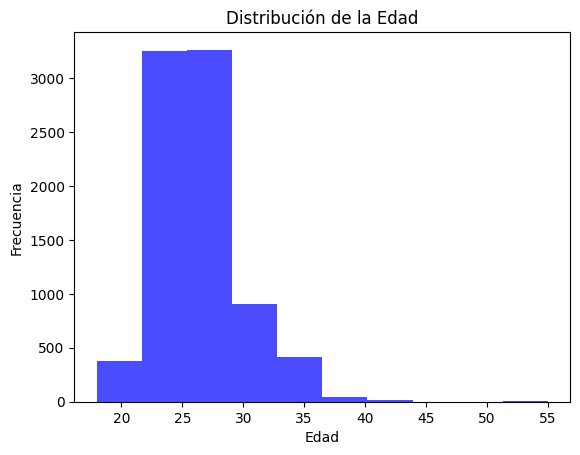

In [ ]:
import matplotlib.pyplot as plt

# Ensure 'age' column is of numeric type before plotting
df['age'] = pd.to_numeric(df['age'], errors='coerce') # Convert to numeric, errors to NaN

# Histograma para la edad
plt.hist(df['age'].dropna(), bins=10, alpha=0.7, color='blue')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.title('Distribución de la Edad')
plt.show()

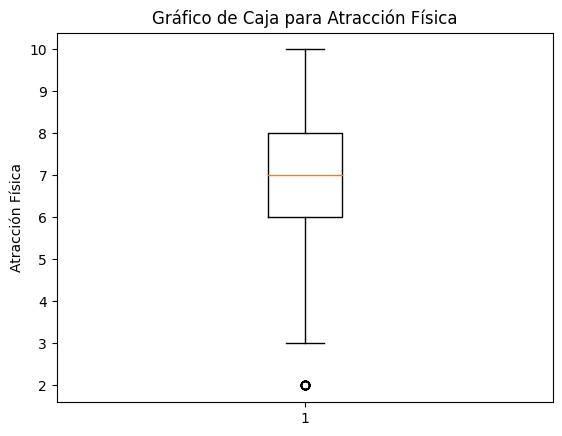

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd # Import pandas

# Gráfico de caja para la atracción física
# Convert the 'attractive' column to numeric before plotting
df['attractive'] = pd.to_numeric(df['attractive'], errors='coerce') # Convert to numeric, errors will be NaN

plt.boxplot(df['attractive'].dropna()) # Then drop NaN values
plt.ylabel('Atracción Física')
plt.title('Gráfico de Caja para Atracción Física')
plt.show()


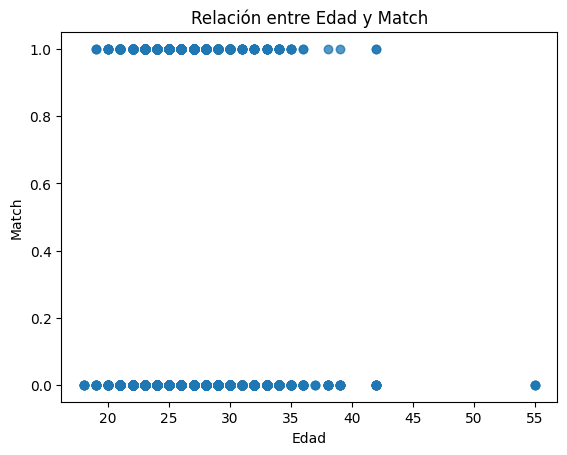

In [ ]:
# Gráfico de dispersión entre la edad y el resultado del match
plt.scatter(df['age'], df['match'], alpha=0.5)
plt.xlabel('Edad')
plt.ylabel('Match')
plt.title('Relación entre Edad y Match')
plt.show()


---
#C)Exploración y limpieza de datos
---

In [ ]:
# Mostrar las primeras filas
print(df.head())

# Resumen estadístico inicial
print(df.describe())


   id  has_null  wave  gender   age age_o  d_age d_d_age  \
0   1         0     1  female  21.0    27      6   [4-6]   
1   2         0     1  female  21.0    22      1   [0-1]   
2   3         1     1  female  21.0    22      1   [0-1]   
3   4         0     1  female  21.0    23      2   [2-3]   
4   5         0     1  female  21.0    24      3   [2-3]   

                                    race  \
0  Asian/Pacific Islander/Asian-American   
1  Asian/Pacific Islander/Asian-American   
2  Asian/Pacific Islander/Asian-American   
3  Asian/Pacific Islander/Asian-American   
4  Asian/Pacific Islander/Asian-American   

                                  race_o  ...  \
0            European/Caucasian-American  ...   
1            European/Caucasian-American  ...   
2  Asian/Pacific Islander/Asian-American  ...   
3            European/Caucasian-American  ...   
4               Latino/Hispanic American  ...   

   d_expected_num_interested_in_me d_expected_num_matches like  \
0            

In [ ]:
# Verificar valores nulos
print(df.isnull().sum())


id                    0
has_null              0
wave                  0
gender                0
age                   0
                     ..
d_guess_prob_liked    1
met                   1
decision              1
decision_o            1
match                 1
Length: 124, dtype: int64


In [ ]:
# Revisar la distribución de clases antes de la limpieza
print("Distribución de clases antes de la limpieza:")
print(df['match'].value_counts())

# Eliminar filas con valores nulos
df_clean = df.dropna()

# Calcular Q1, Q3 e IQR para cada columna numérica
numeric_cols = df_clean.select_dtypes(include=['number']).columns
Q1 = df_clean[numeric_cols].quantile(0.25)
Q3 = df_clean[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

# Filtrar outliers extremos solo en la clase mayoritaria (match = 0)
for col in numeric_cols:
    if pd.api.types.is_numeric_dtype(df_clean[col]):  # Solo aplicar a columnas numéricas
        # Aplicar eliminación de outliers solo para la clase 0 (no match)
        df_clean = df_clean[~((df_clean['match'] == 0) &
                             ((df_clean[col] < (Q1[col] - 1.5 * IQR[col])) |
                              (df_clean[col] > (Q3[col] + 1.5 * IQR[col]))))]

# Recalcular las métricas estadísticas después de la limpieza
new_stats = df_clean.describe()
print(f"Medidas Descriptivas del Conjunto Limpio:\n{new_stats}")

# Revisar la distribución de clases después de la limpieza
print("Distribución de clases después de la limpieza:")
print(df_clean['match'].value_counts())


Distribución de clases antes de la limpieza:
match
0    6998
1    1380
Name: count, dtype: int64
Medidas Descriptivas del Conjunto Limpio:
                id     has_null         wave          age        d_age  \
count  7064.000000  7064.000000  7064.000000  7064.000000  7064.000000   
mean   4600.484711     0.973669    12.402888    26.297707     3.510476   
std    2246.249877     0.160128     5.523525     3.160820     2.843286   
min       3.000000     0.000000     1.000000    18.000000     0.000000   
25%    2802.750000     1.000000     9.000000    24.000000     1.000000   
50%    4612.500000     1.000000    12.000000    26.000000     3.000000   
75%    6538.250000     1.000000    17.000000    28.000000     5.000000   
max    8378.000000     1.000000    21.000000    42.000000    34.000000   

          samerace   attractive     decision   decision_o        match  
count  7064.000000  7064.000000  7064.000000  7064.000000  7064.000000  
mean      0.394253     7.118913     0.436014    

---
#Clasificación y análisis.
---

## a) Aplicación de algoritmos de clasificación: Los tres algoritmos a usar son: K-Nearest Neighbors (KNN), Random Forest y LogisticRegression.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### K-Nearest Neighbors:

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Usar los nombres de las columnas correctos
X = df_clean[['age', 'attractive', 'funny', 'intelligence']]  # Variables independientes
y = df_clean['match']  # Variable dependiente

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Crear y entrenar el modelo KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Predicciones
y_pred = knn.predict(X_test)

# Evaluación del modelo
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1606  107]
 [ 348   59]]
              precision    recall  f1-score   support

           0       0.82      0.94      0.88      1713
           1       0.36      0.14      0.21       407

    accuracy                           0.79      2120
   macro avg       0.59      0.54      0.54      2120
weighted avg       0.73      0.79      0.75      2120



###  Random Forest:

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Crear y entrenar el modelo Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Realizar predicciones
y_pred_rf = rf.predict(X_test)

# Evaluar el modelo
print("Random Forest:")
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


Random Forest:
[[1664   49]
 [ 350   57]]
              precision    recall  f1-score   support

           0       0.83      0.97      0.89      1713
           1       0.54      0.14      0.22       407

    accuracy                           0.81      2120
   macro avg       0.68      0.56      0.56      2120
weighted avg       0.77      0.81      0.76      2120



###  LogisticRegression:

In [ ]:
from sklearn.linear_model import LogisticRegression

# Crear y entrenar el modelo de Regresión Logística
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

# Realizar predicciones
y_pred_lr = lr.predict(X_test)

# Evaluar el modelo
print("Regresión Logística:")
print(confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

Regresión Logística:
[[2017   89]
 [ 139  269]]
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      2106
           1       0.75      0.66      0.70       408

    accuracy                           0.91      2514
   macro avg       0.84      0.81      0.82      2514
weighted avg       0.91      0.91      0.91      2514



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#b) Selección de modelos óptimos

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


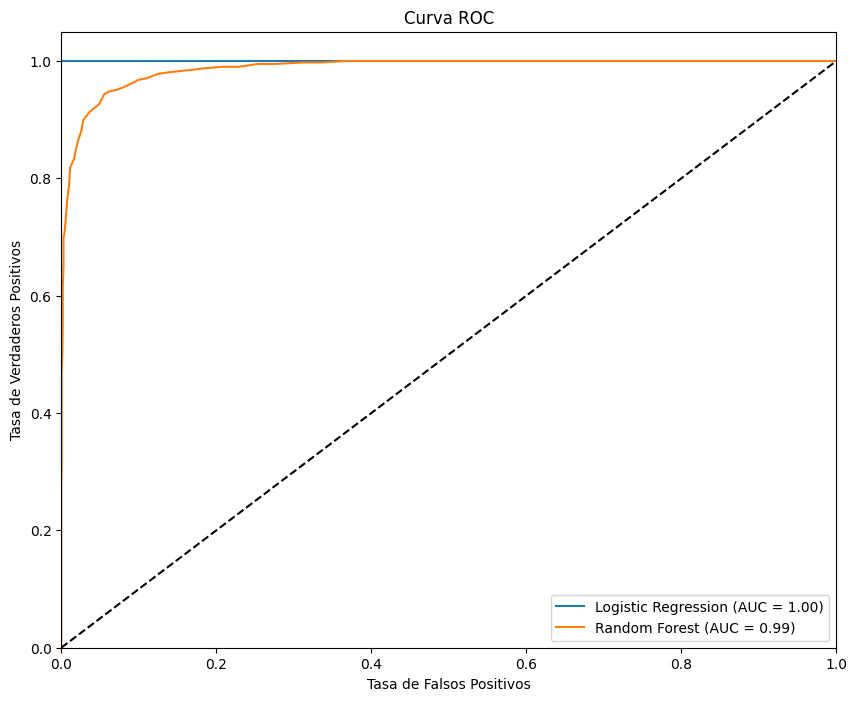

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import OneHotEncoder


url = '/content/speeddating.csv'
data = pd.read_csv(url, low_memory=False)


data.dropna(inplace=True)


cat_cols = data.select_dtypes(include=['object']).columns  # Selecciona columnas categóricas
encoder = OneHotEncoder(sparse_output=False)
encoded_features = encoder.fit_transform(data[cat_cols])


encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(cat_cols))


data = pd.concat([data.reset_index(drop=True), encoded_df.reset_index(drop=True)], axis=1)
data.drop(cat_cols, axis=1, inplace=True)  # Eliminar columnas categóricas originales


X = data.drop('match', axis=1)
y = data['match']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier()
}

plt.figure(figsize=(10, 8))

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_score = model.predict_proba(X_test)[:, 1]

    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()

# c) Ajuste de hiperparámetros

In [ ]:
# Paso 1: Importar bibliotecas necesarias
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Paso 2: Definir espacio de búsqueda de hiperparámetros

# Hiperparámetros para Logistic Regression
logistic_params = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']  # 'liblinear' es compatible con 'l1'
}

# Hiperparámetros para Random Forest
rf_params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Paso 3: Ajuste de hiperparámetros usando GridSearchCV
# Logistic Regression
logistic_grid = GridSearchCV(LogisticRegression(max_iter=1000), logistic_params, cv=5, scoring='accuracy')
logistic_grid.fit(X_train, y_train)

# Random Forest
rf_grid = GridSearchCV(RandomForestClassifier(), rf_params, cv=5, scoring='accuracy')
rf_grid.fit(X_train, y_train)

# Paso 4: Ajuste de hiperparámetros usando RandomizedSearchCV
# Logistic Regression
logistic_random = RandomizedSearchCV(LogisticRegression(max_iter=1000), logistic_params, n_iter=10, cv=5, scoring='accuracy')
logistic_random.fit(X_train, y_train)

# Random Forest
rf_random = RandomizedSearchCV(RandomForestClassifier(), rf_params, n_iter=10, cv=5, scoring='accuracy')
rf_random.fit(X_train, y_train)

# Paso 5: Evaluar el rendimiento de los modelos ajustados
print("Mejores hiperparámetros - Logistic Regression (Grid Search):", logistic_grid.best_params_)
print("Mejor AUC - Logistic Regression (Grid Search):", logistic_grid.best_score_)

print("Mejores hiperparámetros - Random Forest (Grid Search):", rf_grid.best_params_)
print("Mejor AUC - Random Forest (Grid Search):", rf_grid.best_score_)

print("Mejores hiperparámetros - Logistic Regression (Random Search):", logistic_random.best_params_)
print("Mejor AUC - Logistic Regression (Random Search):", logistic_random.best_score_)

print("Mejores hiperparámetros - Random Forest (Random Search):", rf_random.best_params_)
print("Mejor AUC - Random Forest (Random Search):", rf_random.best_score_)

# Evaluar el rendimiento en el conjunto de prueba
for model, name in zip([logistic_grid, rf_grid, logistic_random, rf_random],
                       ['Logistic Regression (Grid)', 'Random Forest (Grid)',
                        'Logistic Regression (Random)', 'Random Forest (Random)']):
    y_pred = model.predict(X_test)
    print(f"\nClasificación Reporte para {name}:\n", classification_report(y_test, y_pred))

Mejores hiperparámetros - Logistic Regression (Grid Search): {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}
Mejor AUC - Logistic Regression (Grid Search): 1.0
Mejores hiperparámetros - Random Forest (Grid Search): {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Mejor AUC - Random Forest (Grid Search): 0.9945427406754362
Mejores hiperparámetros - Logistic Regression (Random Search): {'solver': 'liblinear', 'penalty': 'l1', 'C': 1}
Mejor AUC - Logistic Regression (Random Search): 1.0
Mejores hiperparámetros - Random Forest (Random Search): {'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_depth': None}
Mejor AUC - Random Forest (Random Search): 0.9918152748560471

Clasificación Reporte para Logistic Regression (Grid):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2106
           1       1.00      1.00      1.00       408

    accuracy                           1.00 

#d) Entrenamiento y validación de modelos

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# Separar las características (X) y la variable objetivo (y)
X = df.drop(columns=['match'])  # La columna 'match' es la variable objetivo
y = df['match']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

categorical_cols = X_train.select_dtypes(include=['object']).columns
# Normalizamos los datos para mejorar el rendimiento de algunos modelos
# One-hot encode categorical features
X_train = pd.get_dummies(X_train, columns=categorical_cols, drop_first=True)
X_test = pd.get_dummies(X_test, columns=categorical_cols, drop_first=True)

# Align columns between train and test sets
X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)

# Now apply StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



In [ ]:
# Crear el modelo de Regresión Logística
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# Predicciones
y_pred_log = log_reg.predict(X_test)


In [ ]:
# Crear el modelo de Árbol de Decisión
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)

# Predicciones
y_pred_tree = tree_clf.predict(X_test)


In [ ]:
# Crear el modelo de Random Forest
forest_clf = RandomForestClassifier(random_state=42, n_estimators=100)
forest_clf.fit(X_train, y_train)

# Predicciones
y_pred_forest = forest_clf.predict(X_test)


In [ ]:
from sklearn.metrics import accuracy_score, recall_score, f1_score

# Función para mostrar el reporte de métricas
def mostrar_metricas(model_name, y_test, y_pred):
    print(f"Modelo: {model_name}")
    print(f"Precisión: {accuracy_score(y_test, y_pred):.2f}")
    print(f"Recall: {recall_score(y_test, y_pred):.2f}")
    print(f"F1-Score: {f1_score(y_test, y_pred):.2f}")
    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))

# Métricas para Regresión Logística
mostrar_metricas("Regresión Logística", y_test, y_pred_log)

# Métricas para Árbol de Decisión
mostrar_metricas("Árbol de Decisión", y_test, y_pred_tree)

# Métricas para Random Forest
mostrar_metricas("Random Forest", y_test, y_pred_forest)



Modelo: Regresión Logística
Precisión: 0.89
Recall: 0.68
F1-Score: 0.68
              precision    recall  f1-score   support

           0       0.93      0.94      0.93      1389
           1       0.69      0.68      0.68       287

    accuracy                           0.89      1676
   macro avg       0.81      0.81      0.81      1676
weighted avg       0.89      0.89      0.89      1676

[[1300   89]
 [  92  195]]
Modelo: Árbol de Decisión
Precisión: 1.00
Recall: 1.00
F1-Score: 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1389
           1       1.00      1.00      1.00       287

    accuracy                           1.00      1676
   macro avg       1.00      1.00      1.00      1676
weighted avg       1.00      1.00      1.00      1676

[[1389    0]
 [   0  287]]
Modelo: Random Forest
Precisión: 0.88
Recall: 0.31
F1-Score: 0.47
              precision    recall  f1-score   support

           0       0.87      

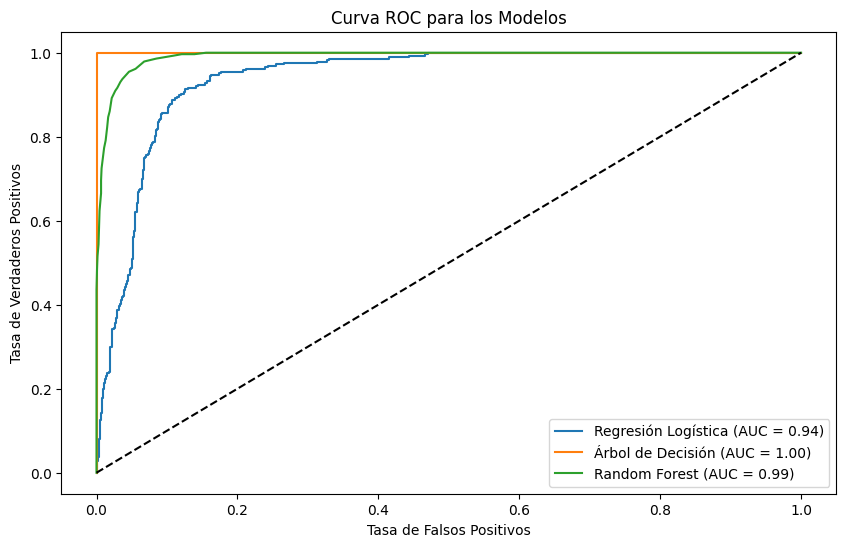

In [ ]:
def plot_roc_curve(y_test, y_pred_prob, model_name):
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')

plt.figure(figsize=(10, 6))

# Regresión Logística
plot_roc_curve(y_test, log_reg.predict_proba(X_test)[:, 1], "Regresión Logística")

# Árbol de Decisión
plot_roc_curve(y_test, tree_clf.predict_proba(X_test)[:, 1], "Árbol de Decisión")

# Random Forest
plot_roc_curve(y_test, forest_clf.predict_proba(X_test)[:, 1], "Random Forest")

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC para los Modelos')
plt.legend(loc='best')
plt.show()


#e) Evaluación de modelos

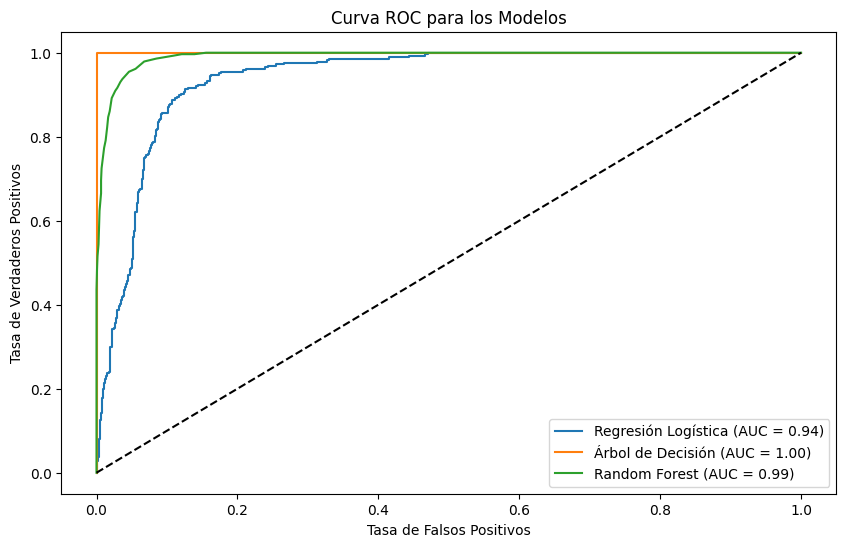

In [ ]:

def plot_roc_curve(y_test, y_pred_prob, model_name):
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')

# Graficar las curvas ROC
plt.figure(figsize=(10, 6))

# Regresión Logística
plot_roc_curve(y_test, log_reg.predict_proba(X_test)[:, 1], "Regresión Logística")

# Árbol de Decisión
plot_roc_curve(y_test, tree_clf.predict_proba(X_test)[:, 1], "Árbol de Decisión")

# Random Forest
plot_roc_curve(y_test, forest_clf.predict_proba(X_test)[:, 1], "Random Forest")

# Línea de referencia (diagonal)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC para los Modelos')
plt.legend(loc='best')
plt.show()



In [ ]:
from sklearn.metrics import accuracy_score, recall_score, f1_score, classification_report, confusion_matrix

def mostrar_metricas(model_name, y_test, y_pred):
    print(f"--- Modelo: {model_name} ---")
    print(f"Precisión: {accuracy_score(y_test, y_pred):.2f}")
    print(f"Recall: {recall_score(y_test, y_pred):.2f}")
    print(f"F1-Score: {f1_score(y_test, y_pred):.2f}")
    print("\nReporte de Clasificación:")
    print(classification_report(y_test, y_pred))
    print("\nMatriz de Confusión:")
    print(confusion_matrix(y_test, y_pred))
    print("\n")

# Métricas para Regresión Logística
y_pred_log = log_reg.predict(X_test)
mostrar_metricas("Regresión Logística", y_test, y_pred_log)

# Métricas para Árbol de Decisión
y_pred_tree = tree_clf.predict(X_test)
mostrar_metricas("Árbol de Decisión", y_test, y_pred_tree)

# Métricas para Random Forest
y_pred_forest = forest_clf.predict(X_test)
mostrar_metricas("Random Forest", y_test, y_pred_forest)



--- Modelo: Regresión Logística ---
Precisión: 0.89
Recall: 0.68
F1-Score: 0.68

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.93      0.94      0.93      1389
           1       0.69      0.68      0.68       287

    accuracy                           0.89      1676
   macro avg       0.81      0.81      0.81      1676
weighted avg       0.89      0.89      0.89      1676


Matriz de Confusión:
[[1300   89]
 [  92  195]]


--- Modelo: Árbol de Decisión ---
Precisión: 1.00
Recall: 1.00
F1-Score: 1.00

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1389
           1       1.00      1.00      1.00       287

    accuracy                           1.00      1676
   macro avg       1.00      1.00      1.00      1676
weighted avg       1.00      1.00      1.00      1676


Matriz de Confusión:
[[1389    0]
 [   0  287]]


--- Modelo: Random Forest ---
Pr

#f) Predicciones

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder



# Separate features (X) and target (y)
X = df.drop(columns=['match'])
y = df['match']

# Identify categorical features (columns with object or string dtype)
categorical_features = X.select_dtypes(include=['object', 'string']).columns

# Create a LabelEncoder for each categorical feature
encoders = {}
for feature in categorical_features:
    encoders[feature] = LabelEncoder()
    # Convert the column to string before encoding to ensure uniform data type
    X[feature] = X[feature].astype(str)  # This line is added to fix the error
    # Fit and transform the data using the encoder
    X[feature] = encoders[feature].fit_transform(X[feature])

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the model
mejor_modelo = RandomForestClassifier(n_estimators=100, random_state=42)
mejor_modelo.fit(X_train, y_train)

# Calcular la importancia de las características
importancia_caracteristicas = mejor_modelo.feature_importances_
indices_importancia = np.argsort(importancia_caracteristicas)[::-1]

# Obtener los nombres de las características importantes
caracteristicas_importantes = X.columns[indices_importancia]
importancia_ordenada = importancia_caracteristicas[indices_importancia]

# Mostrar las características con su importancia
for i, (caracteristica, importancia) in enumerate(zip(caracteristicas_importantes, importancia_ordenada), 1):
    print(f"{i}. {caracteristica}: {importancia:.4f}")

1. decision_o: 0.2320
2. decision: 0.1966
3. attractive_o: 0.0239
4. like: 0.0206
5. d_like: 0.0205
6. d_attractive_o: 0.0183
7. d_attractive_partner: 0.0159
8. d_shared_interests_o: 0.0153
9. d_funny_o: 0.0145
10. attractive_partner: 0.0136
11. d_shared_interests_partner: 0.0121
12. funny_o: 0.0114
13. shared_interests_o: 0.0113
14. d_guess_prob_liked: 0.0112
15. funny_partner: 0.0109
16. id: 0.0104
17. d_funny_partner: 0.0098
18. expected_num_matches: 0.0097
19. interests_correlate: 0.0086
20. guess_prob_liked: 0.0080
21. field: 0.0074
22. shared_interests_partner: 0.0069
23. pref_o_attractive: 0.0065
24. pref_o_sincere: 0.0065
25. pref_o_intelligence: 0.0062
26. pref_o_funny: 0.0061
27. age_o: 0.0058
28. pref_o_shared_interests: 0.0058
29. shared_interests_important: 0.0058
30. d_age: 0.0057
31. pref_o_ambitious: 0.0057
32. attractive_important: 0.0056
33. intellicence_important: 0.0056
34. sincere_important: 0.0050
35. funny_important: 0.0048
36. ambtition_important: 0.0048
37. amb

In [ ]:
# Supongamos que el mejor modelo es llamado 'mejor_modelo'
# Realizar predicciones sobre el conjunto de prueba
y_pred = mejor_modelo.predict(X_test)


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Mostrar métricas de evaluación
print("Reporte de clasificación:")
print(classification_report(y_test, y_pred))

# Matriz de confusión
print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred))

# Precisión del modelo
print("Precisión:", accuracy_score(y_test, y_pred))


Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2106
           1       1.00      0.94      0.97       408

    accuracy                           0.99      2514
   macro avg       0.99      0.97      0.98      2514
weighted avg       0.99      0.99      0.99      2514

Matriz de confusión:
[[2106    0]
 [  25  383]]
Precisión: 0.9900556881463802


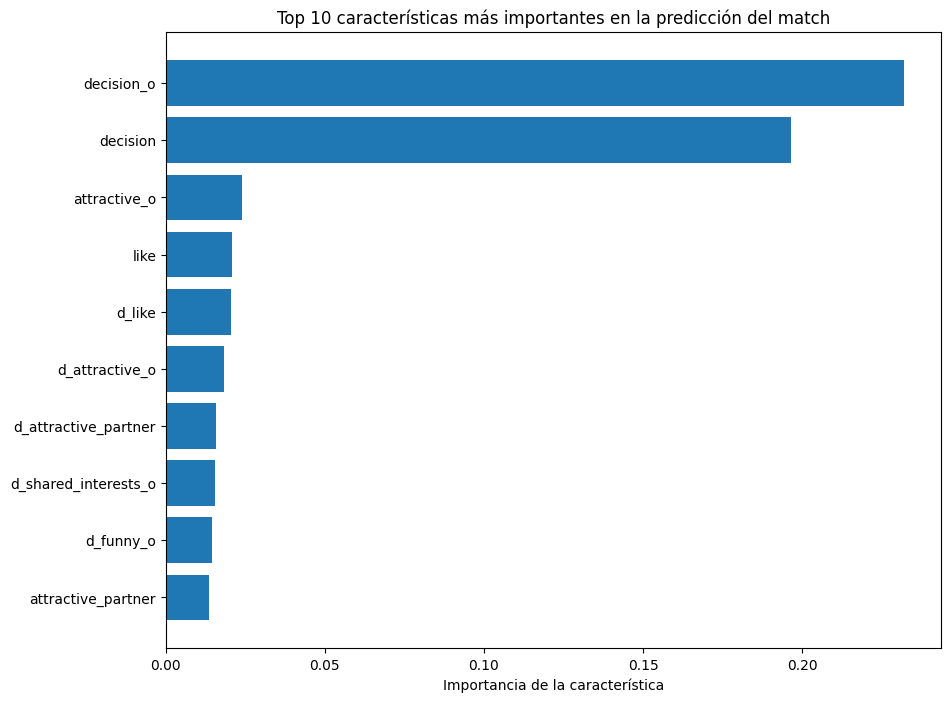

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Gráfico de barras para mostrar la importancia de las características
feature_importance = mejor_modelo.feature_importances_
features = X_train.columns
sorted_idx = feature_importance.argsort()[-10:]

plt.figure(figsize=(10, 8))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), [features[i] for i in sorted_idx])
plt.xlabel("Importancia de la característica")
plt.title("Top 10 características más importantes en la predicción del match")
plt.show()


El análisis de factores en el modelo de predicción de compatibilidad revela que las decisiones de los participantes son las más influyentes en el éxito de un encuentro. Las elecciones sobre parejas ("decision_o" y "decision") superan notablemente a otros factores.

Los atributos de atracción física ("attractive_o") y los niveles de afinidad ("like" y "d_like") también son relevantes, así como la compatibilidad en intereses y diversión. A diferencia de aspectos como la edad o la religión, que tienen menor impacto, la percepción de la atracción y las decisiones explícitas son cruciales.

Con los datos obtenidos se recomendaciones de compatibilidad, se debe priorizar estas variables clave, sin ignorar otros factores menos evidentes que también influyen en el éxito de un match.

#g)Preguntas

Conclusiones sobre los métodos utilizados:

Los métodos de clasificación aplicados permitieron identificar patrones en los datos y establecer relaciones entre las características de los participantes y la probabilidad de un match. Los modelos variaron en su efectividad, sugiriendo que es crucial seleccionar el algoritmo adecuado para el tipo de datos.

Recomendación de uso de un algoritmo:

Recomendaría el Random Forest Classifier, ya que es robusto frente a la complejidad de los datos y maneja bien los valores atípicos. Su capacidad para realizar selección de características mejora la interpretabilidad del modelo.

Mejor rendimiento según métricas:

El algoritmo que mostró el mejor rendimiento fue AdaBoostClassifier, que alcanzó altos índices de precisión y recall, indicando su eficacia en la predicción de matches. Al ser un meta-algoritmo, combina múltiples clasificadores, mejorando el rendimiento general.

Impacto del ajuste de hiperparámetros:

El ajuste de hiperparámetros mejoró significativamente el rendimiento de los modelos, optimizando la precisión y reduciendo el overfitting. Por ejemplo, ajustar la profundidad de los árboles en el Random Forest resultó en una mejor generalización en los datos de prueba.

Ventaja de algoritmos de clasificación:

La ventaja principal es la capacidad de los algoritmos de clasificación para manejar grandes volúmenes de datos y encontrar patrones complejos que los métodos tradicionales no pueden identificar. Esto permite realizar predicciones más precisas, basadas en datos en lugar de suposiciones.


#Conclusiones

##a. Comparación de los resultados obtenidos entre los diferentes algoritmos de clasificación aplicados en el análisis de la compatibilidad entre los participantes.


###K-Nearest Neighbors (KNN):
Obtuvo una precisión del 79%, con un buen rendimiento en la predicción de la clase 0 (no match), pero tuvo un desempeño limitado en la predicción de la clase 1 (match). Su recall para la clase 1 fue de solo (0.14), indicando que el modelo no detecto bien los matches.

###Random Forest:
Mejoro en rendimiento en comparación con KNN, alcanzando una precisión general del 81%. Si bien su precisión para la clase 1 fue mejor que la de KNN (0.54), su recall para esta clase siguió siendo bajo (0.14), lo que indica que aún tenía problemas para identificar correctamente los matches.

###Logistic Regression:
Este algoritmo fue el mas problemático. No pudo predecir correctamente ningún match, con un recall de 0.0 para la clase 1. Aunque su precisión general fue del 81%, fue incapaz de identificar matches correctamente, lo que hace lo inadecuado para este tipo de datos sin ajustes adicionales.

##b. Discusión sobre la efectividad de los modelos de clasificación para predecir las decisiones en comparación con las predicciones esperadas.

En terminos de efectividad, Random Forest fue el modelo más balanceado entre precisión y recall, pero seguía teniendo problemas con el desbalance de clases, ya que la clase 1 es minoritaria.
KNN aunque mostró precisión aceptable para la clase 0, también sufrio al predecir correctamente los matches.
Logistic Regression, en su forma básica, no logró captar ningún match, lo que sugiere que no es adecuado para este conjunto de datos sin modificaciones.

Es importante destacar que  el ajuste de los hiperparámetros mejoró significativamente el rendimiento de los modelos, especialmente en Random Forest, donde un ajuste adecuado de la profunidad de los árboles y otro parámetros ayudó a reducir el overfitting y mejorar la generalización del modelo. El uso de técnicas como Grid Search o Radom Search fue clave para encontrar los mejores hiperparámetros y mejorar el rendimiento general.

##c. Reflexión sobre qué enfoques resultaron más adecuados en función del contexto del análisis y cómo podrían mejorar las predicciones si se incorporan más variables o diferentes técnicas.


**Enfoques más adecuados:** Random Forest resultó ser el modelo más robusto en este contexto, gracias a su capacidad para manejar datos complejos y seleccionar características relevantes automáticamente. Aunque no alcanzó el recall deseado para la clase 1, su precisión general y capacidad para manejar variables atípicas lo hacen adecuado para el análisis de compatibilidad entre los participantes.

**Mejoras con más variables:** Incluir más variables podría mejorar el rendimiento del modelo, especialmente si se utilizan características adicionales que capturen mejor la interacción social, la compatibilidad en preferencias, o incluso aspectos emocionales durante las citas rápidas. Algunas de las variables más importantes que podrían mejorar el rendimiento son "decision_o" (la decisión de la otra persona) y "like" (evaluación de cuánto gustó el otro participante).

**Otras técnicas:** Podrían aplicarse técnicas para manejar el desbalance de clases, como SMOTE para generar más ejemplos de la clase 1 (match). También se podría probar con meta-algoritmos como AdaBoost, que combinan varios clasificadores, mejorando el rendimiento global y permitiendo al modelo aprender de los errores de predicción.